In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import scipy.stats as stats

import acquire


In [2]:
df = acquire.get_iris_data()
df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,3,virginica,6.7,3.0,5.2,2.3
146,3,virginica,6.3,2.5,5.0,1.9
147,3,virginica,6.5,3.0,5.2,2.0
148,3,virginica,6.2,3.4,5.4,2.3


### Split data into train (70%) and test (30%) samples

In [3]:
train, test = train_test_split(df, train_size=.70, random_state=123)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 114 to 109
Data columns (total 6 columns):
species_id      105 non-null int64
species_name    105 non-null object
sepal_length    105 non-null float64
sepal_width     105 non-null float64
petal_length    105 non-null float64
petal_width     105 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.7+ KB
None


In [4]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 72 to 142
Data columns (total 6 columns):
species_id      45 non-null int64
species_name    45 non-null object
sepal_length    45 non-null float64
sepal_width     45 non-null float64
petal_length    45 non-null float64
petal_width     45 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB
None


In [5]:
training = 105 / 150
testing = 45 / 150

print(f"Training {training}% and testing {testing}%.")

Training 0.7% and testing 0.3%.


### 2. Create a swarmplot using a melted dataframe of all your numeric variables.  The x-axis is the variable name, the y-axis is the measure. 

- THEN add another dimension using color to represent species.  Document any takeaways from this visualization

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
species_id      150 non-null int64
species_name    150 non-null object
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Swarmplot is Categorical vs. Continuous

# create a second df, dropping the one column that isn't a data type, "species_name"

train = train.drop(columns=["species_name"])

train

,species_id,sepal_length,sepal_width,petal_length,petal_width
114,3,5.8,2.8,5.1,2.4
136,3,6.3,3.4,5.6,2.4
53,2,5.5,2.3,4.0,1.3
19,1,5.1,3.8,1.5,0.3
38,1,4.4,3.0,1.3,0.2
...,...,...,...,...,...
17,1,5.1,3.5,1.4,0.3
98,2,5.1,2.5,3.0,1.1
66,2,5.6,3.0,4.5,1.5
126,3,6.2,2.8,4.8,1.8


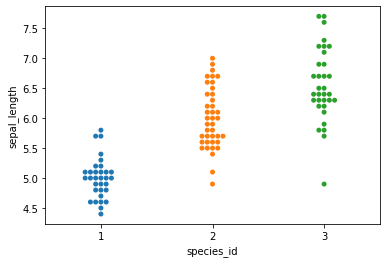

In [8]:
# isnt't the above the same as a melted df?  At any rate:
# Swarmplotting:

sns.swarmplot(x="species_id", y="sepal_length", data=train)

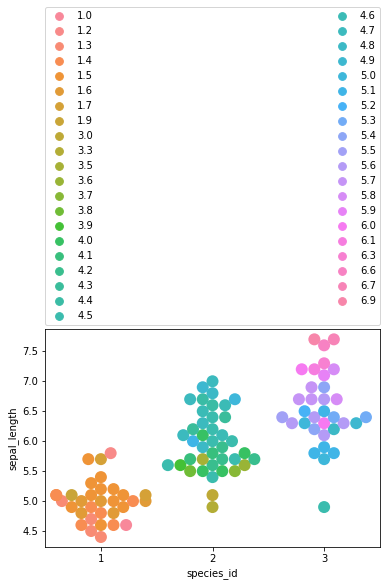

In [9]:
# Now adding a 3rd dimension, putting the swarmplot legend at the top (b/c it's
# so big), and increasing the size of the points for my old-guy eyes.

sns.swarmplot(x="species_id", y="sepal_length", data=train, hue="petal_length", size=12)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

#### Key takeaways:

- in the first two species, 'sepal_length' and 'petal_length' are directly proportional: the shorter one is, the shorter the other.  Not so with the third species - the two are inversely proportional.  The longer the sepal_length, the shorter the petal_length.

### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots - scatterplots show the relationship between continuous variables (numerical vs. numerical)

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length
- Make your figure size 14 x 8. What are your takeaways?

ValueError: Unrecognized character e in format string

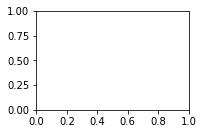

In [15]:
x = np.linspace(0, 10, 10)
y1 = "sepal_length"
y2 = "sepal_width"
y3 = "petal_length"
y4 = "petal_width"

plt.figure()

plt.subplot(2, 2, 1)
plt.plot(x, y1)
plt.title("species_id vs. sepal_length")

plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.title("species_id vs. sepal_width")

plt.subplot(2, 2, 3)
plt.plot(x, y3)
plt.title("species_id vs. petal_length")

plt.subplot(2, 2, 4)
plt.plot(x, y4)
plt.title("species_id vs. petal_width")

### COME BACK TO^^


### 4. Create a heatmap of each variable layering correlation coefficient on top.  Heatmaps represent one limited variable's relationship with another limited variable (discrete vs. discrete)


In [ ]:
pd.crosstab(train.)